In [494]:
"""The purpose of this document is to quickly analyze the main datapoints of a new test run csv file."""

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file = "data/L230218.CSV"

df_raw = pd.read_csv(file)

In [495]:
col = ['Date', 'Time', 'Lat', 'Lon', 'Speed m/s', 'Distance km',
        'RPM 1', 'Motor Load 1 %', 'Motor Torque 1 %', 'Motor Temp 1 C',
        'Pack Current 1 A', 'Pack Voltage 1 V', 'Pack Temp 1 C', 'SOC 1 %']

df = df_raw[col]

/tmp/ipykernel_3422/3453385072.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(header_ind, inplace=True)       # Drop headers
/tmp/ipykernel_3422/3453385072.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col])    # Change all but date/times to numeric


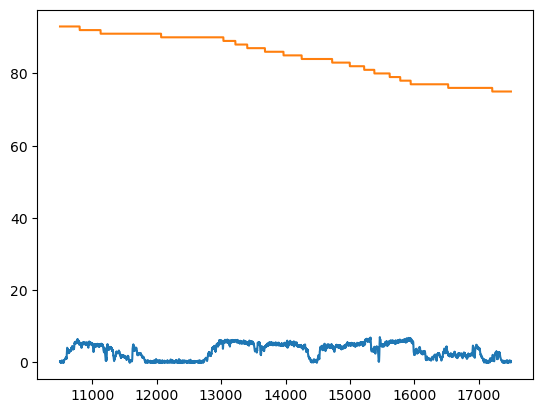

In [496]:
header_ind = df[df['Lat']=='Lat'].index.tolist()
df.drop(header_ind, inplace=True)       # Drop headers

for col in df.columns[2:]:
    df[col] = pd.to_numeric(df[col])    # Change all but date/times to numeric

df = df[10500:17500]
plt.plot(df.index, df['Speed m/s'], df['SOC 1 %'])

In [497]:
high_charge = df[df['SOC 1 %']>100].index.tolist()
low_charge = df[df['SOC 1 %']<3].index.tolist()
bogus_battery = high_charge+low_charge
df.drop(bogus_battery, inplace=True)         # Drop rows with bogus battery values

# plt.plot(df.index, df['SOC 1 %'])

In [498]:
'''Check time is 1 second apart'''
tFMT = "%H:%M:%S"
df['Time'] = pd.to_datetime(df['Time'], format=tFMT)

s_ind = [1]
for i in range(1, len(df)):
    time_diff = df['Time'].iloc[i] - df['Time'].iloc[i-1]
    s_ind.append(time_diff.seconds)
df['Time_Diff'] = s_ind

slopes = [0]
for i in range(1, len(df)):
    slope = df['SOC 1 %'].iloc[i] - df['SOC 1 %'].iloc[i-1]
    slopes.append(slope)
df['Slopes'] = slopes

In [499]:
runs_dict = {}
list = []
cnt = 0
start = 0
for i in range(start, len(df)):
    
    if df['Time_Diff'].iloc[i]==1:
        list.append(i)
    elif df['Time_Diff'].iloc[i]>2:
        if len(list)>120:
            # print(list) 
            cnt+=1
            run = 'Run %d' % (cnt)
            runs_dict[run] = df.iloc[list]
        list = [i]
        start = i

In [500]:
for run in runs_dict:
    plt.plot(runs_dict[run].index, runs_dict[run]['SOC 1 %'])
    # print(run, 'len:', len(runs_dict[run]))